# Categorias de Noticias

In [1]:
import numpy as np
from keras.datasets import reuters


2022-08-14 22:14:34.601806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-14 22:14:34.601832: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)  # descarga de los datos


2110848/2110848 [==============================] - 4s 2us/step


In [ ]:
train_data.shape


(8982,)

In [ ]:
translator = {index: word for word, index in reuters.get_word_index().items()}
noticia = " ".join([translator.get(i - 3, "?") for i in train_data[0]])
noticia


565248/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

#Procesamiento previo del input_data

In [ ]:
def vectorize_data(sequences):
    results = np.zeros((len(sequences), 10000))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


vectorize_data(train_data)

x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)


def to_one_hot(labels):
    dimension = 46
    result = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        result[i, label] = 1.0
    return result


y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)


In [ ]:
from keras import models
from keras import layers


#Construcción del modelo

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]


# Entrenamiento

In [ ]:
history = model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)


Epoch 1/20
16/16 [==============================] - 2s 67ms/step - loss: 2.7277 - accuracy: 0.5075 - val_loss: 1.8199 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 1.4803 - accuracy: 0.7057 - val_loss: 1.3450 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 1s 49ms/step - loss: 1.0824 - accuracy: 0.7737 - val_loss: 1.1705 - val_accuracy: 0.7340
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8509 - accuracy: 0.8200 - val_loss: 1.0489 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6787 - accuracy: 0.8584 - val_loss: 0.9618 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5432 - accuracy: 0.8876 - val_loss: 0.9189 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4421 - accuracy: 0.9093 - val_loss: 0.8903 - val_accuracy: 0.8160
Epoch 8/20
16

#Resultados

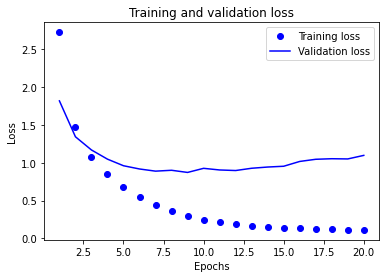

In [ ]:
import matplotlib.pyplot as plt

hist_dict = history.history

loss_values = hist_dict["loss"]
val_loss_values = hist_dict["val_loss"]
acc = hist_dict["accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


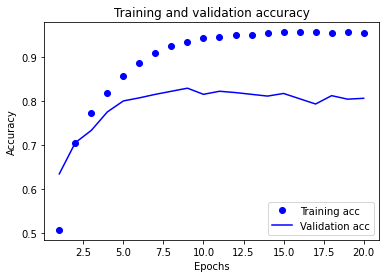

In [ ]:
plt.clf()
acc_values = hist_dict["accuracy"]
val_acc_values = hist_dict["val_accuracy"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()


# Ajuste y Reentrenamiento

Se entrenanan solo 9 *epochs* ya que es aproximadamente en ese punto donde el desempeño empieza a disminuir

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)


Epoch 1/9
16/16 [==============================] - 1s 53ms/step - loss: 2.6735 - accuracy: 0.4777 - val_loss: 1.7326 - val_accuracy: 0.6610
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4256 - accuracy: 0.7060 - val_loss: 1.2957 - val_accuracy: 0.7170
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0587 - accuracy: 0.7719 - val_loss: 1.1250 - val_accuracy: 0.7480
Epoch 4/9
16/16 [==============================] - 1s 43ms/step - loss: 0.8348 - accuracy: 0.8205 - val_loss: 1.0393 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6717 - accuracy: 0.8577 - val_loss: 0.9702 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 44ms/step - loss: 0.5409 - accuracy: 0.8857 - val_loss: 0.9231 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4345 - accuracy: 0.9099 - val_loss: 0.8951 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [ ]:
results = model.evaluate(x_test, y_test)


71/71 [==============================] - 0s 3ms/step - loss: 1.2759 - accuracy: 0.7792


# Predicciones

In [ ]:
prediction_probabilities = model.predict(x_test)
prediction_probabilities


array([[3.4148698e-06, 5.1479374e-06, 6.0791211e-07, ..., 3.2524936e-04,
        8.0709069e-06, 1.5180738e-07],
       [1.8682027e-03, 3.9504785e-03, 5.0961431e-03, ..., 1.9053357e-06,
        3.7381568e-07, 1.6320516e-04],
       [7.6109190e-03, 6.9092554e-01, 2.2794630e-03, ..., 7.7833967e-05,
        1.9065877e-04, 6.8427238e-04],
       ...,
       [7.5266425e-06, 4.1540257e-05, 3.9273282e-06, ..., 1.0844348e-04,
        1.9800376e-05, 1.2111168e-06],
       [9.3442650e-04, 1.1408386e-02, 9.0515608e-04, ..., 1.4462235e-03,
        3.3412490e-04, 1.2485616e-04],
       [5.8563851e-04, 5.2751976e-01, 1.3447780e-02, ..., 4.9390332e-05,
        8.1945363e-05, 9.5017412e-04]], dtype=float32)

In [ ]:
predictions = np.array([np.where(x == max(x))[0][0] for x in prediction_probabilities])
predictions


array([ 3, 10,  1, ...,  3,  4,  1])

In [ ]:
test_labels


array([ 3, 10,  1, ...,  3,  3, 24])

# Experimentación


## Mas dimensiones en la capas intermedias

In [ ]:
model = models.Sequential()
model.add(layers.Dense(128, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/9
16/16 [==============================] - 2s 88ms/step - loss: 2.2550 - accuracy: 0.5590 - val_loss: 1.3806 - val_accuracy: 0.6970
Epoch 2/9
16/16 [==============================] - 1s 77ms/step - loss: 1.1141 - accuracy: 0.7613 - val_loss: 1.1201 - val_accuracy: 0.7460
Epoch 3/9
16/16 [==============================] - 1s 77ms/step - loss: 0.7934 - accuracy: 0.8286 - val_loss: 1.0220 - val_accuracy: 0.7830
Epoch 4/9
16/16 [==============================] - 1s 76ms/step - loss: 0.5697 - accuracy: 0.8829 - val_loss: 0.9368 - val_accuracy: 0.7990
Epoch 5/9
16/16 [==============================] - 1s 78ms/step - loss: 0.4220 - accuracy: 0.9122 - val_loss: 0.9096 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 1s 76ms/step - loss: 0.3232 - accuracy: 0.9295 - val_loss: 0.8705 - val_accuracy: 0.8200
Epoch 7/9
16/16 [==============================] - 1s 77ms/step - loss: 0.2503 - accuracy: 0.9440 - val_loss: 0.9971 - val_accuracy: 0.7890
Epoch 8/9
16/16 [===

[1.0273782014846802, 0.7894033789634705]

## Menos dimensiones en las capas intermedias

In [ ]:
model = models.Sequential()
model.add(layers.Dense(18, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(18, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/9
16/16 [==============================] - 1s 48ms/step - loss: 3.2513 - accuracy: 0.3449 - val_loss: 2.6942 - val_accuracy: 0.3800
Epoch 2/9
16/16 [==============================] - 1s 35ms/step - loss: 2.3461 - accuracy: 0.4625 - val_loss: 2.0554 - val_accuracy: 0.5660
Epoch 3/9
16/16 [==============================] - 1s 35ms/step - loss: 1.8102 - accuracy: 0.6290 - val_loss: 1.6934 - val_accuracy: 0.6340
Epoch 4/9
16/16 [==============================] - 1s 36ms/step - loss: 1.4919 - accuracy: 0.6913 - val_loss: 1.4888 - val_accuracy: 0.6770
Epoch 5/9
16/16 [==============================] - 1s 35ms/step - loss: 1.2862 - accuracy: 0.7251 - val_loss: 1.3547 - val_accuracy: 0.6970
Epoch 6/9
16/16 [==============================] - 1s 36ms/step - loss: 1.1373 - accuracy: 0.7491 - val_loss: 1.2732 - val_accuracy: 0.7220
Epoch 7/9
16/16 [==============================] - 1s 35ms/step - loss: 1.0182 - accuracy: 0.7775 - val_loss: 1.2055 - val_accuracy: 0.7410
Epoch 8/9
16/16 [===

[1.1850464344024658, 0.7430988550186157]

## Menos capas intermedias

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/9
16/16 [==============================] - 1s 62ms/step - loss: 2.6308 - accuracy: 0.5758 - val_loss: 1.8585 - val_accuracy: 0.6620
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.4817 - accuracy: 0.7231 - val_loss: 1.3557 - val_accuracy: 0.7290
Epoch 3/9
16/16 [==============================] - 1s 48ms/step - loss: 1.0656 - accuracy: 0.7904 - val_loss: 1.1385 - val_accuracy: 0.7690
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.8291 - accuracy: 0.8327 - val_loss: 1.0164 - val_accuracy: 0.8040
Epoch 5/9
16/16 [==============================] - 1s 50ms/step - loss: 0.6658 - accuracy: 0.8690 - val_loss: 0.9455 - val_accuracy: 0.8100
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.5441 - accuracy: 0.8900 - val_loss: 0.8971 - val_accuracy: 0.8160
Epoch 7/9
16/16 [==============================] - 1s 48ms/step - loss: 0.4511 - accuracy: 0.9090 - val_loss: 0.8611 - val_accuracy: 0.8260
Epoch 8/9
16/16 [===

[0.9090307950973511, 0.7987533211708069]

## Mas capas intermedias

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

model.compile(
    optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]
)

model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val),
)

model.evaluate(x_test, y_test)


Epoch 1/9
16/16 [==============================] - 2s 62ms/step - loss: 2.8556 - accuracy: 0.4411 - val_loss: 1.8011 - val_accuracy: 0.6180
Epoch 2/9
16/16 [==============================] - 1s 50ms/step - loss: 1.4938 - accuracy: 0.6862 - val_loss: 1.3971 - val_accuracy: 0.6950
Epoch 3/9
16/16 [==============================] - 1s 51ms/step - loss: 1.1179 - accuracy: 0.7506 - val_loss: 1.1933 - val_accuracy: 0.7280
Epoch 4/9
16/16 [==============================] - 1s 50ms/step - loss: 0.8822 - accuracy: 0.8052 - val_loss: 1.1465 - val_accuracy: 0.7460
Epoch 5/9
16/16 [==============================] - 1s 51ms/step - loss: 0.6906 - accuracy: 0.8514 - val_loss: 1.0653 - val_accuracy: 0.7670
Epoch 6/9
16/16 [==============================] - 1s 52ms/step - loss: 0.5469 - accuracy: 0.8831 - val_loss: 0.9989 - val_accuracy: 0.7940
Epoch 7/9
16/16 [==============================] - 1s 50ms/step - loss: 0.4584 - accuracy: 0.9024 - val_loss: 0.9952 - val_accuracy: 0.8050
Epoch 8/9
16/16 [===

[1.2244479656219482, 0.7533392906188965]